# Basic Discourse Analysis

Today we will use Python standard library to perform a basic discourse analysis on a text. We will use the text of the book "Alice's Adventures in Wonderland" by Lewis Carroll. 

We will use various standard modules to perform analysis. 



In [ ]:
# Assignment: Count Most Frequently used words in Veidenbaums.txt
# For English let's use Alice in Wonderland

## Getting the data

1. We could download from the internet.
2. We could use the `requests` module to download the text. - later
3. We could use the `urllib` module to download the text. 


In [ ]:
# let's use built in urrlib model to download the text file and save it in current directory
import urllib.request # this is standard library for downloading files from the internet
# major alternative is requests library, which is more user friendly, but not part of standard library
url = 'https://raw.githubusercontent.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/refs/heads/main/data/Alice_Wonderland.txt'
urllib.request.urlretrieve(url, 'Alice_Wonderland.txt')
# Plan B: if you can't download the file, you can always download it manually and place it in the same directory as this script


('Alice_Wonderland.txt', <http.client.HTTPMessage at 0x2dd07a73710>)

## Verifying the data

Some things we can do to verify the data:

1. Check the length of the text.
2. Check the first few lines of the text.
3. Check the last few lines of the text.

In [ ]:
# let's see what is in our current directory
# we can Path from pathlib library to work with files and directories
from pathlib import Path
# let's see what is in our current directory
current_dir = Path.cwd() # it is OS agnostic works on all platforms Linux, Windows, MacOS
# some other ways of doing it might fail on some platforms
print("Absolute Current Path:", current_dir)

Absolute Path: d:\Github\Digital_Discourse_ETH713_Fall_2020\TextProcessing


### Meaning of Absolute Path

Absolute Path represents the path of the file from the root directory.
This means it is the complete path of the file from the root directory. There can only be one absolute path for a specific file.

In [7]:
from time import strftime
# now since we have our current directory, let's read see what files we have
print("Files in current directory:")
# let's print size and date of last modification as well
for file in current_dir.iterdir():
    # print(file.name, file.stat().st_size, file.stat().st_mtime)
    # let's use user friendly format for size and time
    file_size_KB = file.stat().st_size / 1024
    # let's use strftime to format time

    # "%Y-%m-%d_%H:%M:%S" is how you want to show the time
    # you can change it to your liking as you see fit
    # file_time = strftime("%Y-%m-%d %H:%M:%S", file.stat().st_mtime)
    # format st_mtime as current time in human readable format
    # st_mtime is float number of milliseconds since epoch - 1.1.1970
    # TODO see how we can convert it to human readable format
    print(file.name, f"{file_size_KB:.1f} KB", file.stat().st_mtime)

Files in current directory:
.ipynb_checkpoints 0.0 KB 1675013548.3718455
Alice_clean.txt 151.0 KB 1668610470.4490378
Alice_Wonderland.txt 170.6 KB 1731687849.920705
alice_word_count.tsv 26.5 KB 1668613790.2345233
CountingWords.ipynb 9.6 KB 1657528800.2265394
CountingWords_final.ipynb 196.2 KB 1731688009.4946368
my_folder 0.0 KB 1668610598.6784487
README.md 0.0 KB 1635868828.7869132
word_count.tsv 57.9 KB 1635868828.7879076


In [8]:
# let's see how you would get a list of txt files in the current folder
# we can use glob in pathlib
txt_files = list(current_dir.glob("*.txt")) # very similar to how we use wildcards in bash, windows explorer, finder
print("Text files in current directory:")
for txt_file in txt_files:
    print(txt_file.name)

Text files in current directory:
Alice_clean.txt
Alice_Wonderland.txt


In [ ]:
# our individual files are Path objects, we need to convert them to strings to open them
# print type of txt_files
print(type(txt_files))
# first one type
print(type(txt_files[0])) # will print Windows or PosixPath

<class 'list'>
<class 'pathlib.WindowsPath'>


In [ ]:
# so our assertion is that we have Alice_Wonderland.txt in our current directory
assert Path("Alice_Wonderland.txt").exists(), "Alice_Wonderland.txt file does not exist in current directory"
# another way would be to check txt_files list
# assert "Alice_Wonderland.txt" in txt_files, "Alice_Wonderland.txt file does not exist in current directory"
# above would fail becaus txt_files contains Path objects, not strings
# instead we can convert Path objects to strings

txt_files_str = [str(txt_file) for txt_file in txt_files]
print(txt_files_str)
# now these are strings of full absolute paths
# then we could check using loop
for txt_file in txt_files_str:
    if "Alice_Wonderland.txt" in txt_file:
        # we found the file
        print("Alice_Wonderland.txt file exists in current directory")
        break
else:
    # this is executed if we did not break out of the loop
    print("Alice_Wonderland.txt file does not exist in current directory")
# print string names of our txt_files


['d:\\Github\\Digital_Discourse_ETH713_Fall_2020\\TextProcessing\\Alice_clean.txt', 'd:\\Github\\Digital_Discourse_ETH713_Fall_2020\\TextProcessing\\Alice_Wonderland.txt']
Alice_Wonderland.txt file exists in current directory


## Assertions as means of checking the data

assert is a debugging aid that tests a condition as an expression. If the condition is true, it does nothing and your program just continues to execute. But if the condition is false, it raises an AssertionError exception with an optional error message.

In [ ]:
# so we could open the file as absolute path or relative path

# relative path is relative to current directory
# in this case the path would very simple - Alice_Wonderland.txt that is it

## Opening File

We will try both relative and absolute path to open the file.

Again absolute path is the path of the file from the root directory.

Relative path is the path of the file from the current directory.

In [ ]:
# we will use relative path
relative_path = "Alice_Wonderland.txt"
# let's open the file and read ALL contents into a string
# we will use with statement to open the file

# with is so called context manager
# it will automatically close the file when we are done with it
# with open(relative_path) as file: # reading is default mode
# unfortunately by default we read encoded in ascii meaning basically only english characters
# most often we want to read in utf-8 encoding
# utf-8 supports all characters in all languages, including emojis etc.
# best part is if you are reading ascii text it will be the same as ascii
# this means it will not hurt to put encoding="utf-8" even if you are reading ascii text
# there are other encodings but utf-8 is most common by far

with open(relative_path, mode="r", encoding="utf-8") as file:
    # file is an file stream object - think of something like a pipe or stream of water
    # in this case it is stream of characters
    # read all contents of the file into a string
    text = file.read() # here we read the whole file into a string
    # here file is still open
# here file is closed

# let's print how many characters we have
print("Number of characters in the text:", len(text))
# so we have the entire text as a single string in our text variable residing in memory

Number of characters in the text: 164410


In [ ]:
# Open File - Get Data
# Read Text
# Split Text into word tokens
# Count these tokens (we need to figure out how to)
# Save/Print Results

In [ ]:
# File is under /data/Veidenbaums.txt
# Alice is under /data/Alice_Wonderland.txt
# we are under /TextProcessing/CountingWords.ipynb

In [ ]:
# This means one level up and then again down into data
# "../data/Veidenbaums.txt"
# So called relative path


In [1]:
import os
current_path = os.getcwd()
current_path

'/content'

In [3]:
from pathlib import Path
files = list([f for f in Path("./").glob("*.txt")])
files

[PosixPath('Alice_Wonderland.txt')]

In [5]:
# filePath = "../data/Veidenbaums.txt"
# .. means one level up
# data folder is a sibling of TextProcessing
# filePath = "../data/Alice_Wonderland.txt"
filePath = "Alice_Wonderland.txt" # this is relative to your current working directory
# with is so called context manager
# it will automatically close the file - otherwise you need to do it manually - which everyone forgets to do :)
# with open(filePath, encoding="utf-8") as fstream: # openign a filestream
with open("Alice_Wonderland.txt", encoding="utf-8") as fstream: # openign a filestream
    mytext = fstream.read() # here our textual data is read into memory
    # as with most things in Python after : you need to indent
    # fstream is still open here
    # there are other ways to read files - but this is the most common one
    # who said that you can't step into the same river twice?
    # you can - but it will be a different river
    # which Greek philosopher said that?
    # Heraclitus - one of the pre-Socratics
    # with file streams we can reset the pointer to the beginning of the file
    # fstream.seek(0) - rare that you would need to do this
    # usually you read the file once and then do something with it - like count words
    # you do not need to read the file again - maybe you will want to write it again but that is a different story
# once indentation ends here fstream is closed automatically for you
len(mytext) # how many symbols are in our text

164410

In [6]:
with open("sample_data/README.md", encoding="utf-8") as file_stream:
    readme_text = file_stream.read() # so reads all of it into memory
    # file_stream is still open but completely read here
# here file is closed completely
print(readme_text)

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).



In [14]:
mytext[:120] # first 120 symbols from our text

'\ufeffThe Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone '

In [15]:
mytext[-200:] # last two hundred symbols of our text

'-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter to hear about new eBooks.\n\n\n'

In [16]:
print(mytext[:300]) # print first 300 symbols
# print gives your more human readable output than just typing the variable name - which is more suitable for debugging

The Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms o


In [ ]:
# so one issue is that pretty much any data source will need additional cleaning
# here we have header and footer sections with some legal data
# this meta-data would distort our analysis
# for one we would get mentions of Mr. Gutenberg
# which Mr. Lewis Carrol did not intend


In [17]:
# type of mytext is string
type(mytext)

str

In [18]:
# so we need to do some cleaning first
# ideas on getting rid of header and footer sections
#
mytext.index("End of Project Gutenberg")
#this will the index of the first mention of the string

145459

In [19]:
len(mytext)

164410

## Checking start and end of our text

In [22]:
# let's print first N symbols
N = 1_200
print(text[:N]) # so simple slicing works on strings

The Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using this ebook.

Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Release Date: June 25, 2008 [EBook #11]
[Most recently updated: October 12, 2020]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit

In [23]:
## how about last N symbols
print(text[-N:]) # so simple slicing works on strings

nberg Web pages for current donation
methods and addresses. Donations are accepted in a number of other
ways including checks, online payments and credit card donations. To
donate, please visit: www.gutenberg.org/donate

Section 5. General Information About Project Gutenberg-tm electronic works.

Professor Michael S. Hart was the originator of the Project
Gutenberg-tm concept of a library of electronic works that could be
freely shared with anyone. For forty years, he produced and
distributed Project Gutenberg-tm eBooks with only a loose network of
volunteer support.

Project Gutenberg-tm eBooks are often created from several printed
editions, all of which are confirmed as not protected by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our Web site which has the main PG search
facility: www.gutenberg.org

This Web site includes information about Project Gutenberg

## Getting rid of header

So we have determined that header ends with 4 new lines. That gives us a way to get rid of the header automatically.

In [24]:
# we want to keep the original so we will use a new variable for this
# we want find the first place where 5 newlines are in a row
# we can use find method in string
# so our needle will be 5 newlines in a row
needle = "\n\n\n\n\n" # so we escape newline with \n

# where is it
start = text.find(needle) # so find returns -1 if it does not find anything
# we could have used index method as well which raises an exception if it does not find anything
print(f"Start of the text: {start}")

Start of the text: 867


In [25]:
# print N symbols after the needle
print(f"Print first {N} symbols after the needle")
print(text[start:start+N]) # so simple slicing works on strings

Print first 1200 symbols after the needle





Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as

In [26]:
# it turned out that we want the 2nd occurence of the needle to be the cut off point
# we could use loop to find the 2nd occurence
needle = "\n\n\n\n\n" # so we escape newline with \n
occurence = 2
start = 0
for i in range(occurence):
    # we will keep advancing the start index each time we find the needle
    # we add len(needle) to start to skip the needle itself
    start = text.find(needle, start) + len(needle)
    if start == -1: # if we do not find it
        break
# print the start index
print(f"Start of the text: {start}")

Start of the text: 1437


In [27]:
# let's print first N symbols after the needle
print(f"Print first {N} symbols after the needle")
print(text[start:start+N]) # so simple slicing works on strings

Print first 1200 symbols after the needle
CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so _very_ remarkable in that; nor did Alice think it
so _very_ much out of the way to hear the Rabbit say to itself, “Oh
dear! Oh dear! I shall be late!” (when she thought it over afterwards,
it occurred to her that she ought to have wondered at this, but at the
time it all seemed quite natural); but when the 

## Using end marker to find the end

Similarly we can use the end marker to find the end of the text.

In case of Project Gutenberg, the end marker is "End of Project Gutenberg" which should work for any Project Gutenberg text.

In [28]:
end_of_text = "End of Project Gutenberg"
end_index = text.find(end_of_text) # first occurence of the end_of_text will suit us fine
print(f"End of the text: {end_index}")

End of the text: 145459


In [ ]:
# let's look at some characters around this end_index
# this is called context
# we will use context_window variable to say how many characters we want to see around the end_index
context_window = 100
print(f"Show {context_window} characters around the end_index")
print(text[end_index-context_window:end_index+context_window]) # so simple slicing

Show 100 characters around the end_index
 in all
their simple joys, remembering her own child-life, and the happy summer
days.

THE END 




End of Project Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll

*** END OF THIS PROJE


In [30]:
# let's cut the text at start and end index
clean_text = text[start:end_index] # simple slicing
# how long is our clean text
print(f"Length of clean text: {len(clean_text)}")

Length of clean text: 144022


## Cleaning whitespace

We probably want to get rid of starting and ending whitespace. We can use the `strip` method for that.

In [31]:
print(f"ORIGINAL length before cleaning: {len(text)}")
print(f"CUT length after cutting start and end: {len(clean_text)}")
# now let's strip the text of leading and trailing whitespaces
clean_text = clean_text.strip() # strip removes leading and trailing whitespaces including newlines and tabs
# how long is our clean text
print(f"CLEANED Length of clean text: {len(clean_text)}")

ORIGINAL length before cleaning: 164410
CUT length after cutting start and end: 144022
CLEANED Length of clean text: 144016


## Getting rid of extra newlines

You  might want to get rid of extra newlines. We can use the `replace` method for that.

First let's count how many newlines we have.
For that we actually need the text split into lines.


In [32]:
# so let's split our text into lines
# we will use splitlines method
# this is a very common operation
# we will split our text into lines

rows = clean_text.splitlines() # so we split our text into lines
# if you want to keep newlines at the end of each line you can use split("\n")
# let's see how many lines we have
print(f"Number of lines: {len(rows)}")

Number of lines: 3351


In [33]:
## let's check if we have any completely empty lines
empty_lines = [row for row in rows if row == ""] # remember in this case we did not keep newline symbols
# print how many empty lines we have
print(f"Number of empty lines: {len(empty_lines)}")

Number of empty lines: 874


In [ ]:
# so now you have an option of getting rid of these newlines, or keeping them
# you should write your justification for keeping - keeps structure of the text a bit better
# in this case for word analysis we do not need them so I will show how to get rid of them
full_lines = [row for row in rows if row != ""] # so we keep only non-empty lines
# how many full rows do we have
print(f"Number of full lines: {len(full_lines)}")
# this might be a number to be used in your analysis for each document

Number of full lines: 2477


## Analysing Full Text

Now that we have full lines let's go back to full text - that is one string.

In [35]:
# now we will join all the strings together into a single string
full_text = "\n".join(full_lines) # so we join all the lines with newline symbol because we did not keep it
# if we had newlines at end of each line we would use "".join(full_lines) to join them without any separator

# let's see how many characters we have in our full_text
print(f"Number of characters in full_text: {len(full_text)}")

Number of characters in full_text: 143142


## Getting sentence information

We could use the `nltk` module to get sentence information. 'nlkt' is a natural language processing library in Python. There are many other libraries that can be used for this purpose.

Today we are going use standard library to get sentence information.

So sentence is sequence of words that is terminated by a period, question mark or exclamation mark.

So for our purposes we will split by period, question mark or exclamation mark.

In [36]:
# let's get sentences
# we will use period, exclamation mark and question mark as sentence separators - this is very rough but will do for now

# we will use regular expressions to split the text into sentences
import re # regular expressions module - very powerful but also complex 
# we will use findall method to find all sentences
# we will use regular expression to find all sentences
# so we supplied 3 possible sentence endings using square brackets [.!]
sentences = re.split(r"[.!?]", full_text) # so we split the text into sentences
# let's see how many sentences we have
print(f"Number of sentences: {len(sentences)}")

Number of sentences: 1642


In [37]:
# let's print our first N sentences
N = 5
for i, sentence in enumerate(sentences[:N]): # so we use enumerate to get both index and sentence
    print(f"Sentence {i}: {sentence}") # so we print each sentence

Sentence 0: CHAPTER I
Sentence 1: 
Down the Rabbit-Hole
Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations
Sentence 2: ”
So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her
Sentence 3: 
There was nothing so _very_ remarkable in that; nor did Alice think it
so _very_ much out of the way to hear the Rabbit say to itself, “Oh
dear
Sentence 4:  Oh dear


In [38]:
# now last N sentences
N = 5
for i, sentence in enumerate(sentences[-N:]): # so we use enumerate to get both index and sentence
    print(f"Sentence {i}: {sentence}") # so we print each

Sentence 0: 
But her sister sat still just as she left her, leaning her head on her
hand, watching the setting sun, and thinking of little Alice and all
her wonderful Adventures, till she too began dreaming after a fashion,
and this was her dream:—
First, she dreamed of little Alice herself, and once again the tiny
hands were clasped upon her knee, and the bright eager eyes were
looking up into hers—she could hear the very tones of her voice, and
see that queer little toss of her head to keep back the wandering hair
that _would_ always get into her eyes—and still as she listened, or
seemed to listen, the whole place around her became alive with the
strange creatures of her little sister’s dream
Sentence 1: 
The long grass rustled at her feet as the White Rabbit hurried by—the
frightened Mouse splashed his way through the neighbouring pool—she
could hear the rattle of the teacups as the March Hare and his friends
shared their never-ending meal, and the shrill voice of the Queen
ordering

In [39]:
# we could analyze how many words we have in each sentence
# to get a word without using external libraries we could use split method - good but not perfect
sentence_lengths = []
for sentence in sentences:
    words = sentence.split() # so we split the sentence into words
    sentence_lengths.append(len(words)) # so we append the number of words in the sentence
# let's what is the most and least number of words in a sentence and what is the average
max_words = max(sentence_lengths) # so we find the maximum number of words in a sentence
min_words = min(sentence_lengths) # so we find the minimum number of words in a sentence
average_words = sum(sentence_lengths) / len(sentence_lengths) # so we find the average number of words in a sentence

# let's print the results
print(f"Max words in a sentence: {max_words}")
print(f"Min words in a sentence: {min_words}")
print(f"Average words in a sentence: {average_words:.2f}")

Max words in a sentence: 179
Min words in a sentence: 1
Average words in a sentence: 16.52


In [40]:
# we did not save the words so let's generate the actual sentences with words
sentence_words = []
for sentence in sentences:
    words = sentence.split() # so we split the sentence into words
    sentence_words.append(words) # so we append the words in the sentence

# now let's find that sentence that is length of max_words
max_words_sentence = None
for words in sentence_words:
    if len(words) == max_words:
        max_words_sentence = words
        print("Eureka! We found the longest sentence")
        break

# let's print the longest sentence
print(" ".join(max_words_sentence))

Eureka! We found the longest sentence
Hardly knowing what she did, she picked up a little bit of stick, and held it out to the puppy; whereupon the puppy jumped into the air off all its feet at once, with a yelp of delight, and rushed at the stick, and made believe to worry it; then Alice dodged behind a great thistle, to keep herself from being run over; and the moment she appeared on the other side, the puppy made another rush at the stick, and tumbled head over heels in its hurry to get hold of it; then Alice, thinking it was very like having a game of play with a cart-horse, and expecting every moment to be trampled under its feet, ran round the thistle again; then the puppy began a series of short charges at the stick, running a very little way forwards each time and a long way back, and barking hoarsely all the while, till at last it sat down a good way off, panting, with its tongue hanging out of its mouth, and its great eyes half shut


Now you could analyse these outlier sentences to see if they are actually sentences or not. Provide your own logic to determine if they are sentences or not.

## Counting words

If we can split individual sentences into words, we can also split the whole text into words.


In [ ]:
# so our full_text is a single string

### Normalizing words

We might want to lowercase all the words to make sure we are not counting the same word twice because of different case.

Also we might want to get rid of all punctuation.

Let's do both of these tasks

In [41]:
# lowercase all the text
print(f"Number of characters in full_text: {len(full_text)}")
full_text_lower = full_text.lower() # so we convert all text to lowercase
print(f"Number of characters in full_text_lower: {len(full_text_lower)}")

Number of characters in full_text: 143142
Number of characters in full_text_lower: 143142


In [ ]:
# now let's get rid of all punctuation
# we will use a simple loop
import string # string module has all the punctuation symbols - well there are some exceptions
# we could use translate method to get rid of punctuation but it is a bit more complex
# so we will use a simple loop
bad_chars = string.punctuation # so we get all punctuation symbols
print(f"Removing these characters: {bad_chars}")

# let's see how many characters we have now
print(f"Number of characters in full_text_lower WITH punctuation: {len(full_text_lower)}")
for char in bad_chars:
    full_text_lower = full_text_lower.replace(char, "") # so we replace each punctuation symbol with empty string

# let's see how many characters we have now
print(f"Number of characters in full_text_lower WITHOUT punctuation: {len(full_text_lower)}")

# punctuation is gone
# for your analysis you might want to keep some punctuation, maybe you want to analyse exclamation marks for one

Removing these characters: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Number of characters in full_text_lower WITH punctuation: 143142
Number of characters in full_text_lower WITHOUT punctuation: 137891


In [ ]:
# now let's check the word usage
# we will use split method to split all of the text into words
words = full_text_lower.split() # so we split the text into words
# how many words do we have after splitting
print(f"Number of words: {len(words)}")

# let's print a random sample of 10 words
import random # random module is part of standard library

# we will use sample method to get a random sample of 10 words
sample_words = random.sample(words, 10) # so we get a random sample of 10 words
# let's print the sample
print(sample_words)
# sampling allows us to check whether our cleaning was successful and if we have any weird words
# should sample 50-100 words to get a good idea

Number of words: 26381
['again', 'and', 'even', 'went', 'you', 'on', 'minute', 'solemnly', 'upon', 'have']


In [46]:
# counting is easy we use counter from collections module
from collections import Counter # so we import Counter class from collections module
# we will use Counter to count the words
word_counts = Counter(words) # so we count the words
# let's see what are the N most common words
# we will use most_common method
N = 25
most_common_words = word_counts.most_common(N) # so we get N most common words
# let's print the most common words
for word, count in most_common_words:
    print(f"{word}: {count}")

the: 1608
and: 787
to: 710
a: 615
she: 532
of: 493
said: 457
it: 446
alice: 383
in: 353
was: 351
you: 296
i: 265
as: 254
her: 247
that: 234
at: 205
on: 181
had: 177
with: 175
all: 168
for: 141
very: 139
be: 139
so: 136


In [48]:
# now we could remove stopwords
# for now let's check most common words that are X characters long or longer
all_top_words = word_counts.most_common() # so we get all the words
# all_top_words is a list of tuples - word and count
X = 5
most_common_long_words = [(word, count) for word, count in all_top_words if len(word) >= X]
# let's print the N most common long words
for word, count in most_common_long_words:
    print(f"{word}: {count}")

alice: 383
little: 125
about: 92
herself: 83
could: 77
would: 77
thought: 74
again: 68
there: 67
queen: 65
began: 57
quite: 55
gryphon: 55
hatter: 54
turtle: 54
don’t: 53
their: 51
voice: 46
looked: 45
first: 44
which: 44
think: 43
rabbit: 42
never: 41
after: 40
round: 40
thing: 40
great: 39
other: 38
duchess: 37
“what: 36
dormouse: 36
mouse: 35
before: 33
large: 33
march: 32
white: 30
looking: 30
nothing: 29
found: 29
heard: 29
replied: 29
moment: 28
might: 28
seemed: 27
going: 27
should: 27
can’t: 27
caterpillar: 27
that”: 26
right: 25
rather: 25
without: 24
while: 24
three: 24
“it’s: 23
added: 23
shall: 22
another: 22
things: 22
“well: 22
won’t: 22
getting: 21
know”: 21
cried: 20
minute: 20
tried: 19
however: 19
being: 19
anything: 18
that’s: 17
words: 17
you’re: 17
table: 17
curious: 17
house: 17
something: 17
course: 17
asked: 17
under: 16
turned: 16
there’s: 16
hastily: 16
doesn’t: 16
spoke: 16
“that’s: 16
wonder: 15
please: 15
talking: 15
question: 15
“come: 15
“that: 15
called:

## Analyzing the word counts

Now you could provide some basic analysis of the word counts.

### TODO in near future

1. Find the most common word.
2. Find the least common word.
3. Find unique words. - what is the vocabulary of the text? perhaps compare with other texts.
4. How would we find normal word forms? - hint: stemming or lemmatization

In [ ]:
# so there are about 17000 symbols between the end of the book and the end of the file
# we can use this to get rid of the footer
# we can also use this to get rid of the header


In [24]:
mytext.index("NotEnd of Project Gutenberg") # raises Error

ValueError: ignored

In [23]:
mytext.find("NotEnd of Project Gutenberg") # gives you -1

-1

In [25]:
# so cleanend will be a new string containing only the text of the book from the start of the book to the end of the book
# we use slicing to get the text we want
cleanend = mytext[:mytext.find("End of Project Gutenberg")]
# cleanend = mytext[:mytext.index("End of Project Gutenberg")] # would raise error if not found

# of course this assumes we know the sentinel value for our end of the book
# so this will cut and save text to last character
# before the above text is found
len(cleanend)

145459

In [26]:
print(cleanend[-200:]) # last 200 characters

of Wonderland of long ago: and how she
would feel with all their simple sorrows, and find a pleasure in all
their simple joys, remembering her own child-life, and the happy summer
days.

THE END 







In [28]:
# first we find out where the header ends
start_index = cleanend.index("START OF THIS PROJECT GUTENBERG EBOOK")
start_index

729

In [30]:
# we also need to know how many characters to skip
skip = len("START OF THIS PROJECT GUTENBERG EBOOK")
skip

37

In [31]:
cleanall = cleanend[start_index+skip:] # so we want everything from the index+skip
print(cleanall[:250]) # print first 250 characters of our cleaned text

 ALICE’S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER 


In [32]:
cleanall.count("Illustration")

1

In [33]:
#reallyclean = cleanall[cleanall.find("Illustration")+len("Illustration")]
def cut_off_start(text, sentinel):
    if sentinel not in text:
        print(f"nothing to do no {sentinel} found!")
        return text # nothing to do
    start = text.find(sentinel)
    skip = len(sentinel)
    new_text = text[start+skip:] # so new text is everything after start + skip number of characters
    return new_text


In [34]:
really_clean_text = cut_off_start(cleanall, "Illustration")
len(really_clean_text)

144593

In [37]:
# remember strip method on strings, let's get rid of any whitespace in beginning and end
trimmed_text = really_clean_text.strip()
len(trimmed_text)

144587

In [38]:
# i will open/create a new file with name Alice_cleaned.txt
# notice it is in the same folder as current notebook
# mode is w - which means write
# encoding is utf-8 - we might have some non-ascii characters
# file_out is arbitrary name for our filestream object
with open('Alice_clean.txt', mode="w", encoding="utf-8") as file_out:
    file_out.write(trimmed_text)
# so this recipe will create/overwrite 'Alice_clean.txt'
# using utf-8 encoding
# will write ALL of the text that is in trimmed_text variable

In [ ]:
# i could also save the file in a different folder in this case like data which is our sibling folder
with open('../data/Alice_clean.txt', mode="w", encoding="utf-8") as file_out:
    file_out.write(cleanall)
# so this recipe will create/overwrite 'Alice_clean.txt' in data
# using utf-8 encoding
# will write ALL of the text that is in cleanall variable

In [39]:
# how to create a folder if it does not exist?
# we can use pathlib
# pathlib is a new module in Python 3
# it is a bit more advanced than os

# we can use pathlib to create a folder if it does not exist
# we can also use it to check if a folder exists

# from pathlib import Path # import Path from pathlib module need to import only once
# we can create a path object

# create folder my_folder if it does not exist
Path("my_folder").mkdir(exist_ok=True) # exist_ok=True means do not throw an error if folder exists
# in this case it will be a child folder of current folderb
# next time i run it it will not throw an error

In [40]:
# so this is how I would copy the same data into a folder and then file name
with open('my_folder/Alice_clean.txt', mode="w", encoding="utf-8") as file_out:
    file_out.write(cleanall)

In [ ]:
# lets pretend i do not have cleanall in memory
# i can load text from my clean file
# mode r is read which is default so not really needed
with open('../data/Alice_clean.txt', mode="r", encoding="utf-8") as file:
    # mytext = file.read() # so reads everything
    # alterantively we can read line by line
    # this is useful if we have a very large file
    # we can read line by line and process it
    text_lines = file.readlines() # this will read all lines into a list
# print first 10 lines
print(text_lines[:20])

[' ALICE’S ADVENTURES IN WONDERLAND ***\n', '\n', '\n', '\n', 'Produced by Arthur DiBianca and David Widger\n', '\n', '[Illustration]\n', '\n', '\n', '\n', '\n', 'Alice’s Adventures in Wonderland\n', '\n', 'by Lewis Carroll\n', '\n', 'THE MILLENNIUM FULCRUM EDITION 3.0\n', '\n', 'Contents\n', '\n', ' CHAPTER I.     Down the Rabbit-Hole\n']


## Mounting and reading / writing from Google Drive

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
text_files = list([f for f in Path("drive/MyDrive").glob("*.txt")])
text_files

[PosixPath('drive/MyDrive/13177-8.txt'),
 PosixPath('drive/MyDrive/example_results.txt')]

In [45]:
# so lets open up first file from my results and see whats inside
# turns out this uses older 90s encoding ISO-8859-1
# all encodings supported: https://docs.python.org/3/library/codecs.html#standard-encodings
with open(text_files[0], encoding="ISO-8859-1") as f:
    unknown_text = f.read()
print(len(unknown_text))
unknown_text[:100]


163074


'The Project Gutenberg EBook of Chocolate and Cocoa Recipes and Home Made\nCandy Recipes, by Miss Parl'

## Tokenization

In [ ]:
# so let's see about tokenization
# one is to use split using white space

In [46]:
mysentence = "A quick brown fox    jumped \t over the   \n \n sleepy dog"
# we have some newlines and some tabs in our sentence
print(mysentence)

A quick brown fox    jumped 	 over the   
 
 sleepy dog


In [47]:
# Python string has a split method which will split a string into a list of strings
mysentence.split()  # so we split by white space, including newlines and tabs
# you can consider split a type of tokenization

['A', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'sleepy', 'dog']

In [48]:
mysentence.split(" ") # so we split by single white space, this might not be what we want

['A',
 'quick',
 'brown',
 'fox',
 '',
 '',
 '',
 'jumped',
 '\t',
 'over',
 'the',
 '',
 '',
 '\n',
 '\n',
 'sleepy',
 'dog']

In [50]:
# we could try splitting already but we will get dirty data(words)
mywords = cleanall.split() # so any white space will be a delimiter
len(mywords)

26537

In [51]:
mywords[:25]

['ALICE’S',
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 '***',
 'Produced',
 'by',
 'Arthur',
 'DiBianca',
 'and',
 'David',
 'Widger',
 '[Illustration]',
 'Alice’s',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'THE',
 'MILLENNIUM',
 'FULCRUM',
 'EDITION',
 '3.0']

In [ ]:
# so we need to get rid of some \n which split did not
# so how could we do this?
# replace to rescue!


In [53]:
# so replacing every new line with something in this case one whitespace
clean_text = trimmed_text.replace("\n", " ") # why not nothing ""?
# replacing with "" we run the risk of combining words across lines
clean_text[:100]

']     Alice’s Adventures in Wonderland  by Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0  Conten'

In [54]:
# remember replace is a string method it returns a new string
# so we need to assign it to a variable
# we can use it to replace multiple characters or strings
# we can also use it to replace with nothing

# for example
bob_adventures = cleanall.replace("ALICE", "BOB").replace("Alice", "Bob")
# so for example we can replace all mentions of Alice with Bob
print(bob_adventures[:100])

 BOB’S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]



In [55]:
# count Bob
bob_adventures.count("Bob")

399

In [ ]:
len(cleanall)-len(bob_adventures) # so we have lost some characters

800

In [ ]:
# TODO
# before we split we might want to normalize our text - make it all lower case
# we also might want to remove punctuation
# we can use string.punctuation to get a list of punctuation symbols
# also we can use string.whitespace to get a list of whitespace symbols

## Normalization

In [57]:
clean_text = clean_text[1:] # simple hack to get rid of first character
clean_text = clean_text.strip()

In [58]:
# normalize to lower case
alice_lower = clean_text.lower()
print(alice_lower[:100])
# idea is to make all words lower case so that we do not count the same word twice
# with lowercase you should be aware of some issues
# for example in English we have words like "I" and "i"
# in Latvia we have city Ogre and ogre the mythical creature

alice’s adventures in wonderland  by lewis carroll  the millennium fulcrum edition 3.0  contents   c


In [59]:
# next step is usually to remove punctuation
# we can use string.punctuation to get a list of punctuation symbols
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
# i can make my own string of punctuation symbols
my_punctuation = string.punctuation + "“”‘’*" # you could add numbers etc
print(my_punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”‘’*


In [61]:
# now we want to remove all symbols in my_punctuation from alice_lower
# we can use translate method
# we need to create a translation table
# we can use maketrans method
# we need to pass 3 arguments
# first is a string of characters we want to replace
# second is a string of characters we want to replace with
# third is a string of characters we want to remove
# so we want to replace all punctuation with nothing
# we also want to remove all newlines

# so we can create a translation table

# translation_table = str.maketrans(my_punctuation, " "*len(my_punctuation), "\n")
# translation_table = str.maketrans(my_punctuation, " "*len(my_punctuation), "")
translation_table = str.maketrans(my_punctuation, " "*len(my_punctuation), "")
# use the translation table to translate alice_lower
alice_clean_no_punct = alice_lower.translate(translation_table)
print(alice_clean_no_punct[:100])

alice s adventures in wonderland  by lewis carroll  the millennium fulcrum edition 3 0  contents   c


In [ ]:
# for loops let us iterate over a sequence
for my_char in "Valdis":
    print(my_char)

V
a
l
d
i
s


In [ ]:
# similarly we can iterate any sequence
for my_number in [1,2,3,4,5]:
    print(my_number)

1
2
3
4
5


In [62]:
for bad_char in my_punctuation:
    print(f"Replacing {bad_char} with nothing")

Replacing ! with nothing
Replacing " with nothing
Replacing # with nothing
Replacing $ with nothing
Replacing % with nothing
Replacing & with nothing
Replacing ' with nothing
Replacing ( with nothing
Replacing ) with nothing
Replacing * with nothing
Replacing + with nothing
Replacing , with nothing
Replacing - with nothing
Replacing . with nothing
Replacing / with nothing
Replacing : with nothing
Replacing ; with nothing
Replacing < with nothing
Replacing = with nothing
Replacing > with nothing
Replacing ? with nothing
Replacing @ with nothing
Replacing [ with nothing
Replacing \ with nothing
Replacing ] with nothing
Replacing ^ with nothing
Replacing _ with nothing
Replacing ` with nothing
Replacing { with nothing
Replacing | with nothing
Replacing } with nothing
Replacing ~ with nothing
Replacing “ with nothing
Replacing ” with nothing
Replacing ‘ with nothing
Replacing ’ with nothing
Replacing * with nothing


In [63]:
# instead we can use a loop
# we can use a loop to remove all punctuation

# we go through each symbol in my_punctuation and replace it with nothing in alice_lower
REPLACE_CHAR = " " # you can change this to "" if you want to remove punctuation with nothing
alice_clean_no_punct = alice_lower # we need to start with an alice_lower
for symbol in my_punctuation:
    print(f"Replacing {symbol} with ({REPLACE_CHAR})")
    alice_clean_no_punct = alice_clean_no_punct.replace(symbol, REPLACE_CHAR)
print(f"After cleaning we have {len(alice_clean_no_punct)} characters")

Replacing ! with ( )
Replacing " with ( )
Replacing # with ( )
Replacing $ with ( )
Replacing % with ( )
Replacing & with ( )
Replacing ' with ( )
Replacing ( with ( )
Replacing ) with ( )
Replacing * with ( )
Replacing + with ( )
Replacing , with ( )
Replacing - with ( )
Replacing . with ( )
Replacing / with ( )
Replacing : with ( )
Replacing ; with ( )
Replacing < with ( )
Replacing = with ( )
Replacing > with ( )
Replacing ? with ( )
Replacing @ with ( )
Replacing [ with ( )
Replacing \ with ( )
Replacing ] with ( )
Replacing ^ with ( )
Replacing _ with ( )
Replacing ` with ( )
Replacing { with ( )
Replacing | with ( )
Replacing } with ( )
Replacing ~ with ( )
Replacing “ with ( )
Replacing ” with ( )
Replacing ‘ with ( )
Replacing ’ with ( )
Replacing * with ( )
After cleaning we have 144581 characters


In [64]:
alice_clean_no_punct.find("*")

-1

In [ ]:
# we could also remove all stop words
# stop words are words that do not add much meaning to the text
# for now we will leave them in

In [67]:
# we can finally split
alice_words = alice_clean_no_punct.split()
print(f"We have {len(alice_words)} words")

We have 27324 words


In [68]:
# alice_words is a list of strings
# we can use list methods to work with it
# we could count how many times each word appears
alice_words.count("alice") # 399 because ALICE and Alice merged into alice

399

In [ ]:
# here we could do additionalal cleaning by checking for maybe bad words
# bad characters
# unneeded words such stop words , meaning words which do not contribute to the meaning


In [ ]:
# so how could we count the occurences of each word?
# we could use something like a dictionary with words being keys and value being
# number of occurences

In [69]:
# so alice words is a list of strings
type(alice_words)

list

In [70]:
# first 5 words
alice_words[:5]

['alice', 's', 'adventures', 'in', 'wonderland']

In [71]:

word_dict = {} # {} is an empty dictionary
# what is a dictionary?
# a dictionary is a collection of key value pairs
# each key is unique - usually a string or number(less common)
# key idea is that we have near instant access to the value by key
# values can be repeated
# so we will loop/iterate over all words in alice_words
# we will check if the word is in the dictionary
# if it is we will increment the value by 1
# if it is not we will add it to the dictionary with value 1

for word in alice_words:
    if word in word_dict.keys():
        word_dict[word] += 1 # increase count for each occurence
    else:
        word_dict[word] = 1 # so first occurence you count as 1
    # below is just a shorter version of the above
#     word_dict[word] = word_dict.get(word, 0) + 1
list(word_dict.items())[:20]

[('alice', 399),
 ('s', 202),
 ('adventures', 6),
 ('in', 369),
 ('wonderland', 3),
 ('by', 58),
 ('lewis', 1),
 ('carroll', 1),
 ('the', 1643),
 ('millennium', 1),
 ('fulcrum', 1),
 ('edition', 1),
 ('3', 1),
 ('0', 1),
 ('contents', 1),
 ('chapter', 24),
 ('i', 534),
 ('down', 102),
 ('rabbit', 53),
 ('hole', 5)]

In [72]:
# since counting is so common we can use Counter from collections
# you do not have to write loops yourself :)
from collections import Counter # python already provides counter!
word_count = Counter(alice_words) # give a list of tokens
word_count.most_common(25) # and you can get results immediately

[('the', 1643),
 ('and', 851),
 ('to', 724),
 ('a', 632),
 ('it', 588),
 ('she', 550),
 ('i', 534),
 ('of', 512),
 ('said', 459),
 ('you', 405),
 ('alice', 399),
 ('in', 369),
 ('was', 357),
 ('that', 311),
 ('as', 261),
 ('her', 248),
 ('t', 218),
 ('at', 209),
 ('s', 202),
 ('on', 193),
 ('with', 181),
 ('all', 180),
 ('had', 178),
 ('but', 163),
 ('for', 152)]

In [73]:
# how about most common words that are 4 letters or more?
# we can use a list comprehension
# list comprehension is a way to create a list from another list
# we can use it to filter out words that are too short
# we can also use it to convert all words to lower case
# we can also use it to remove stop words

# we can use a list comprehension to create a list of words that are 4 letters or more
alice_4plus = [word for word in alice_words if len(word) >= 4]
print(f"We have {len(alice_4plus)} words that are 4 letters or more")

We have 14227 words that are 4 letters or more


In [74]:
# alternative would be to use a for loop
alice_4plus = [] # create an empty list
for word in alice_words:
    if len(word) >= 4:
        alice_4plus.append(word) # add word to the list
# same result but more code
# advantage of list comprehension is that it is more compact
# advantage of loop is that you can add more code inside the loop
print(f"We have {len(alice_4plus)} words that are 4 letters or more")

We have 14227 words that are 4 letters or more


In [75]:
# count the most common words
alice_4plus_count = Counter(alice_4plus)
alice_4plus_count.most_common(25)   # still a lot of stop words at least we have removed punctuation

[('said', 459),
 ('alice', 399),
 ('that', 311),
 ('with', 181),
 ('they', 149),
 ('very', 144),
 ('what', 141),
 ('this', 134),
 ('little', 129),
 ('down', 102),
 ('there', 99),
 ('about', 94),
 ('then', 92),
 ('like', 85),
 ('were', 85),
 ('would', 83),
 ('went', 83),
 ('herself', 83),
 ('them', 83),
 ('again', 82),
 ('know', 81),
 ('have', 80),
 ('when', 79),
 ('could', 77),
 ('queen', 76)]

In [ ]:
# so Counters are dictionaries with benefits as I like to say
# we can use them to get most common words




In [76]:
# lets save all of the counter as a tsv file starting with most common
# we can use a with statement to open a file
# of course we could use another format like csv or json - json will be covered later

# will save in current directory
with open("alice_word_count.tsv", "w", encoding="utf-8") as f:
    # first lets write a header
    f.write("word\tcount\n") # \t is a tab character, \n is a newline
    # we go through all words and counts in alice_4plus_count starting with most common
    for word, count in alice_4plus_count.most_common():
        # then we write each word and count to the file
        f.write(f"{word}\t{count}\n")

In [77]:
# will save in current google drive (if it is mounted)
with open("drive/MyDrive/data/alice_word_count.tsv", "w", encoding="utf-8") as f:
    # first lets write a header
    f.write("word\tcount\n") # \t is a tab character, \n is a newline
    # we go through all words and counts in alice_4plus_count starting with most common
    for word, count in alice_4plus_count.most_common():
        # then we write each word and count to the file
        f.write(f"{word}\t{count}\n")

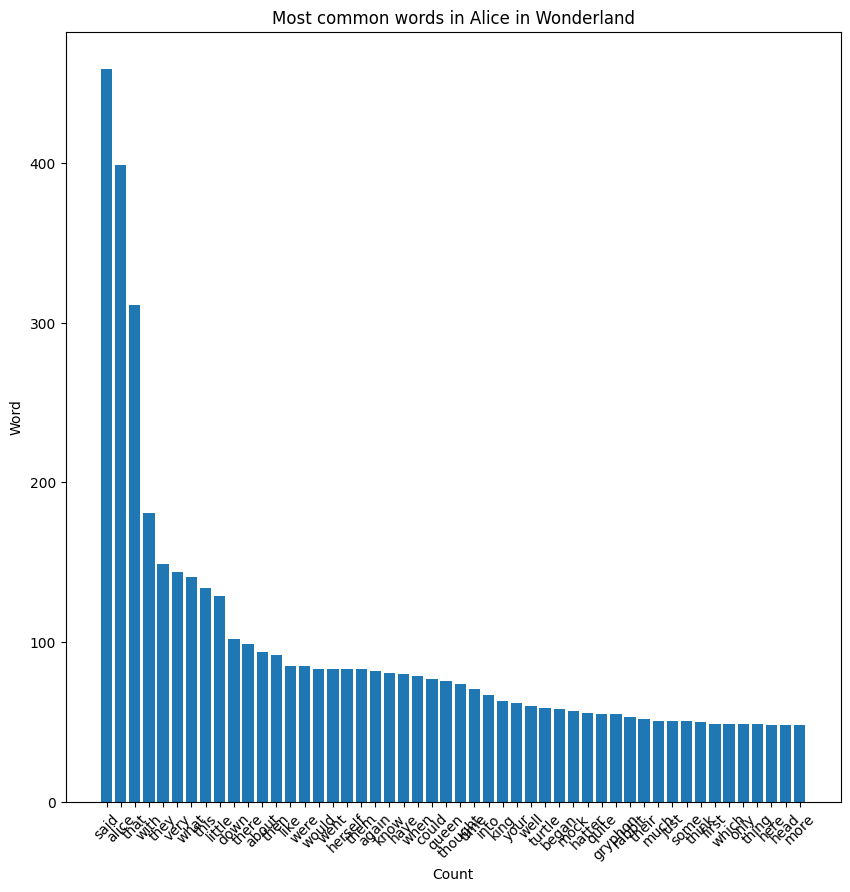

In [79]:
# lets plot most common 50 words and their counts

# we can use matplotlib to plot
# most popular visualization library
# included in Colab install it otherwise locally
# https://matplotlib.org/

import matplotlib.pyplot as plt

# we can use a list comprehension to get the counts and words separately
counts = [count for word, count in alice_4plus_count.most_common(50)]
words = [word for word, count in alice_4plus_count.most_common(50)]

# alternative would be to use a for loop
# counts = []
# words = []
# for word, count in alice_4plus_count.most_common(50):
#     counts.append(count)
#     words.append(word)

# now we can plot

plt.figure(figsize=(10,10)) # we can set the size of the figure
plt.bar(words, counts) # vertical bar chart
# add title and labels
plt.title("Most common words in Alice in Wonderland")
plt.xlabel("Count")
plt.ylabel("Word")
plt.xticks(rotation=45)
plt.show()

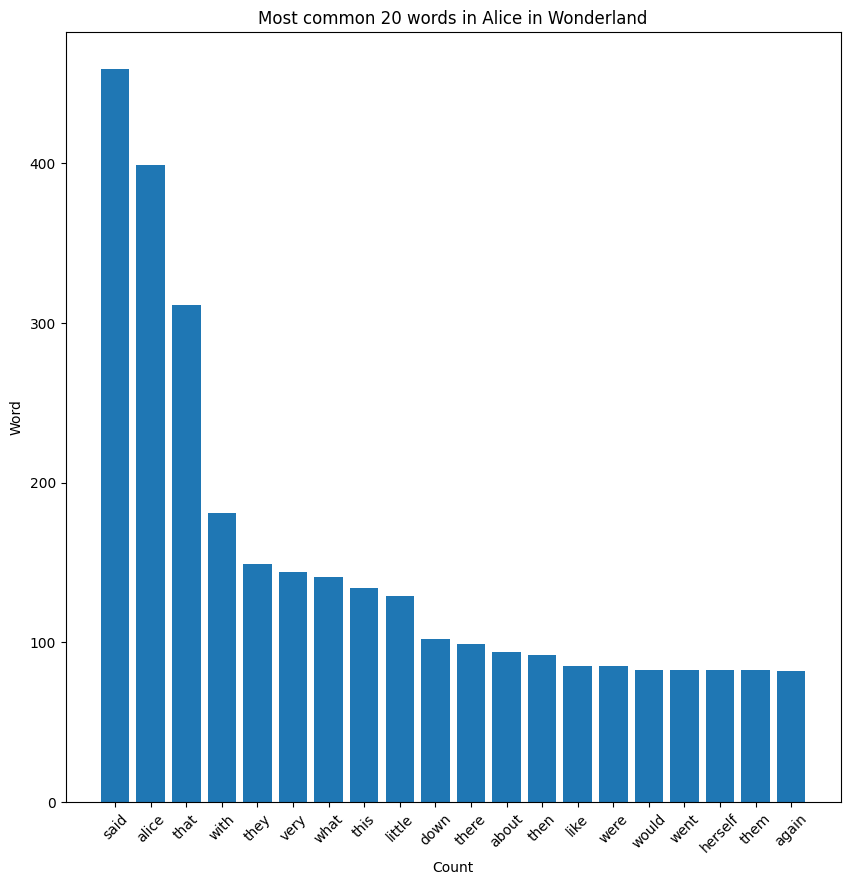

In [82]:
# plot top 20 words and their counts
TOP_COUNT = 20
plt.figure(figsize=(10,10)) # we can set the size of the figure
plt.bar(words[:TOP_COUNT], counts[:TOP_COUNT]) # vertical bar chart
# add title and labels
plt.title(f"Most common {TOP_COUNT} words in Alice in Wonderland")
plt.xlabel("Count")
plt.ylabel("Word")
plt.xticks(rotation=45)
plt.savefig("top_20_alice.png")
plt.show()

In [ ]:
# looks like Zipf's law is holding up
# link to wikipedia https://en.wikipedia.org/wiki/Zipf%27s_law

In [ ]:
type(alice_4plus_count.most_common())

list

In [ ]:
# most common returns a list of tuples
# what is a tuple?
# a tuple is a list that is immutable
# you can not change the values in a tuple, you can not add or remove values
# so list of tuples is roughly analogous to a 2D array

In [ ]:
# so now that we have some prelimenary results in
# we could start thinking about stripping stopwords
# maybe getting rid of very short words

In [ ]:
word_count["she"] # turns out Counter is just a dictionary with some benefits

485

In [ ]:
word_count["he"]

94

In [ ]:
import csv

In [ ]:
with open("word_count.tsv", mode="w", encoding="utf-8") as f:
    f.write("word\tcount\n") # so we add newlines by hand
    for word,count in word_count.most_common():
        f.write(f"{word}\t{count}\n")

In [ ]:
# we can use libraries such as CSV and Pandas to take care of writing
#

In [ ]:
# to continue we will need to perform some additional cleaning
# maybe think about some visualization of some of this data

## Latvian version of word count for Veidenbaums

In [ ]:
# we will need to clean all lines which contain *** as ending characters
# so lets try reading lines
# filePath = "../data/Veidenbaums.txt"
# with open(filePath, encoding="utf-8") as fstream:
#     mylines = fstream.readlines()
# len(mylines)

In [ ]:
mylines[:15]

In [ ]:
cleanlines = [line for line in mylines if line[0]!='\n']
len(cleanlines)

In [ ]:
cleanlines[:5]

In [ ]:
# we do not want the lines which end with ***\n
headlines = [line for line in cleanlines if line.endswith("***\n")]
headlines[:5]
# we do not need the headlines!

In [ ]:
# we do not want the lines which end with ***\n
noheadlines = [line for line in cleanlines if not line.endswith("***\n")]
noheadlines[:5]

In [ ]:
# we could save the results
savePath = "../data/noHeadVeidenbaums.txt"
with open(savePath, mode="w", encoding="utf-8") as fstream:
    fstream.writelines(noheadlines)

In [ ]:
# May 6th lets start with noheadlines
myPath = "../data/noHeadVeidenbaums.txt"
with open(myPath, encoding="utf-8") as fstream:
    noheadlines = fstream.readlines()
len(noheadlines)

366

In [ ]:
#
noheadlines = [line for line in noheadlines if not "Treimanim" in line]
len(noheadlines)

365

In [ ]:
spaceChars = "\n-"
stopChars = """!?.,"':;()…"""


In [ ]:
for char in stopChars:
    print(char)

In [ ]:
# One big text from many lines
textNoHead = "".join(noheadlines) # we could have used fstream.read earlier
textNoHead[:55]

'Pēc ideāliem cenšas lielie gari,\nBet dzīvē ieņemt vietu'

In [ ]:
# take off spacy Characters replace with space (why space ? :)
for char in spaceChars:
    print(f"Replacing {char} with space")
    textNoHead = textNoHead.replace(char, " ")
#     print(textNoHead[:75])
textNoHead[:75]

Replacing 
 with space
Replacing - with space


'Pēc ideāliem cenšas lielie gari, Bet dzīvē ieņemt vietu pirmie Tie neiespēj'

In [ ]:
for char in stopChars:
    print(f"Replacing {char} with nothing")
    textNoHead = textNoHead.replace(char, "")
textNoHead[:55]

Replacing ! with nothing
Replacing ? with nothing
Replacing . with nothing
Replacing , with nothing
Replacing " with nothing
Replacing ' with nothing
Replacing : with nothing
Replacing ; with nothing
Replacing ( with nothing
Replacing ) with nothing
Replacing … with nothing


'Pēc ideāliem cenšas lielie gari Bet dzīvē ieņemt vietu '

In [ ]:
savePath = "../data/noHeadVeidenbaumsOneLine.txt"
with open(savePath, mode="w", encoding="utf-8") as fstream:
    fstream.write(textNoHead)

In [ ]:
textNoHead.index("Vēstule")
# nothing found thats good

ValueError: substring not found

In [ ]:
textNoHead[5400:5430]

'eiz zaļoja jaunība cerības pla'

In [ ]:
# charSet that's Camelcase another style
char_set = set(textNoHead)
char_set

{' ',
 'A',
 'B',
 'C',
 'D',
 'E',
 'G',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'z',
 'Ā',
 'ā',
 'č',
 'Ē',
 'ē',
 'ģ',
 'Ī',
 'ī',
 'ķ',
 'ļ',
 'ņ',
 'Š',
 'š',
 'ū',
 'ž'}

In [ ]:
ord("…")

8230

In [ ]:
words = textNoHead.split()
words[:5]

['Pēc', 'ideāliem', 'cenšas', 'lielie', 'gari']

In [ ]:
# we need to convert to lower case
# for word in words:
words_lower = [word.lower() for word in words]
words_lower[:5]


['pēc', 'ideāliem', 'cenšas', 'lielie', 'gari']

In [ ]:
len(words_lower)

1865

In [ ]:
# if we want to do it ourselves
# we could store it in a dictionary word and count
# {'pēc':5, 'ideālie':1, 'cenšas':3}

In [ ]:
unique_words = set(words_lower)
len(unique_words)

1064

In [ ]:
# i create a dictionary of unique words and set counter to 0
my_counter_dict = {word:0 for word in list(unique_words)}
my_counter_dict['pēc']

0

In [ ]:
for word in words_lower:
    my_counter_dict[word] += 1 # each time i add 1 to right box(key)

In [ ]:
my_counter_dict['pēc']

11

In [ ]:
my_list_tuples = [(key, value) for key,value in my_counter_dict.items()]
my_list_tuples[:5]

[('apkakli', 1), ('šūpulis', 1), ('aša', 1), ('līdz', 8), ('tiesas', 1)]

In [ ]:
sorted(my_list_tuples)[:5]
# not quite what we need because it sorts by the first item alphabetically

[('acs', 1), ('agrāk', 1), ('aiz', 1), ('aizgāja', 1), ('aizmirsts', 1)]

In [ ]:
# solution we pass a function to show how to sort
my_most_common = sorted(my_list_tuples,key=lambda mytuple: mytuple[1], reverse=True)
my_most_common[:10]

[('un', 76),
 ('ir', 24),
 ('vēl', 22),
 ('tu', 21),
 ('tik', 21),
 ('bet', 15),
 ('kas', 15),
 ('nav', 14),
 ('man', 14),
 ('kā', 13)]

In [ ]:
# so sorting is possible but my recommendation is to use Counter

In [ ]:
# well and now I would to like sort
# its possible then I need to create a list from dictionary and then sort by key value
# solution use a library

In [ ]:
# Batteries are included no need to write our own counter
from collections import Counter

In [ ]:
mycounter = Counter(words_lower)


In [ ]:
mycounter.most_common(10)

[('un', 76),
 ('ir', 24),
 ('vēl', 22),
 ('tik', 21),
 ('tu', 21),
 ('bet', 15),
 ('kas', 15),
 ('nav', 14),
 ('man', 14),
 ('par', 13)]

In [ ]:
type(mycounter.most_common(10))

list

In [ ]:
# how to get only words 4 chars or longer ? :)
long_words = [word for word in words_lower if len(word) >= 4 ]
len(long_words)

1283

In [ ]:
long_counter = Counter(long_words)
long_counter.most_common(10)

[('reiz', 10),
 ('viss', 9),
 ('līdz', 8),
 ('mums', 7),
 ('sauc', 6),
 ('gars', 6),
 ('projām', 6),
 ('laiks', 5),
 ('sirds', 5),
 ('tomēr', 5)]

In [ ]:
'alus' in long_counter

True

In [ ]:
type(long_counter)

collections.Counter

In [ ]:
long_counter.get('alus'), long_counter['alus'] #2nd would throw error if no beer existed

(2, 2)

In [ ]:
# we only get 5 letter words here
word_counter_5 = [mytuple for mytuple in long_counter.most_common() if mytuple[1] == 5]
word_counter_5

[('laiks', 5),
 ('sirds', 5),
 ('tomēr', 5),
 ('likumīgi', 5),
 ('dzīves', 5),
 ('iedzer', 5)]

In [ ]:
import json

In [ ]:
with open('most_common.json', mode='w', encoding='utf-8') as fstream:
    json.dump(mycounter.most_common(), fstream, indent=2)

In [ ]:
# if we want to save our Latvian or other languages besides ENglish we set
# turn off ascii
# https://stackoverflow.com/questions/18337407/saving-utf-8-texts-in-json-dumps-as-utf8-not-as-u-escape-sequence
with open('most_common.json', mode='w', encoding='utf-8') as fstream:
    json.dump(mycounter.most_common(), fstream, indent=2, ensure_ascii=False)